In [1]:
import pandas as pd
import numpy as np

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

In [3]:
!wget $data

--2023-09-23 15:13:44--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  1.99MB/s    in 0.7s    

2023-09-23 15:13:45 (1.99 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [5]:
df = pd.read_csv('housing.csv')

In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [11]:
df['ocean_proximity'] = df['ocean_proximity'].str.lower().str.replace(' ', '_')

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='median_house_value', ylabel='Count'>

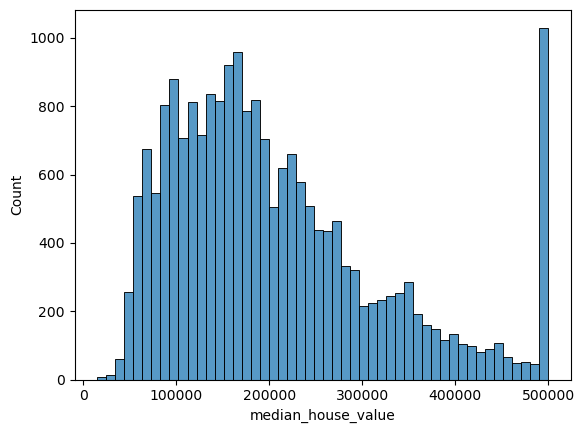

In [14]:
sns.histplot(df.median_house_value, bins=50)

In [25]:
df['ocean_proximity'].unique()

array(['near_bay', '<1h_ocean', 'inland', 'near_ocean', 'island'],
      dtype=object)

In [29]:
df_new = df.loc[(df['ocean_proximity'] == '<1h_ocean') | (df['ocean_proximity'] == 'inland')]

In [31]:
df_new = df_new[['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']]

In [32]:
df_new

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


### Question 1
There's one feature with missing values. What is it?

In [33]:
df_new.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

### Question 2
What's the median (50% percentile) for variable 'population'?

In [36]:
df_new['population'].median()

1195.0

In [39]:
# split dataset
n = len(df_new)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

# shuffle dataset
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
df_shuffled = df_new.iloc[idx]

<Axes: xlabel='median_house_value', ylabel='Count'>

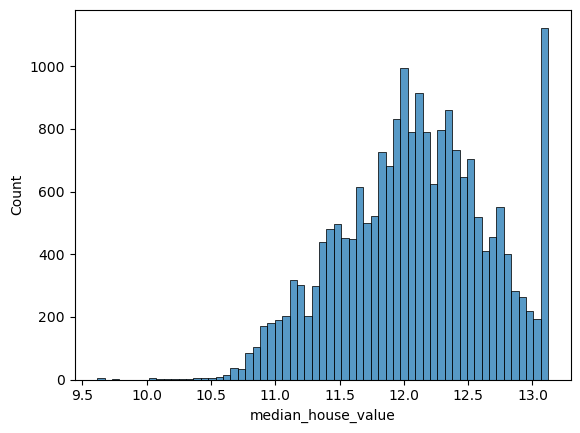

In [40]:
# apply Log transformation
median_house_value_logs = np.log1p(df.median_house_value)

sns.histplot(median_house_value_logs)

### Question 3
Dealing with missing values and getting RMSE score

In [52]:
# linear regression
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [53]:
# preparing the dataset
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [54]:
# preparing the labels
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)

In [55]:
# deleting the dataset
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [59]:
# defining function
def prepare_X(df, fillna_value):
    df_num = df
    df_num = df_num.fillna(fillna_value)
    X = df_num.values
    return X

In [60]:
# function for RMSE
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [62]:
#@ FILLING MISSING VALUES:
mean = df_train.total_bedrooms.mean()

X_mean_train = prepare_X(df_train, fillna_value=mean)
w_0_mean, w_mean = train_linear_regression(X_mean_train, y_train)
X_mean_val = prepare_X(df_val, fillna_value=mean)
y_mean_pred_val = w_0_mean + X_mean_val.dot(w_mean)

In [63]:
# getting RMSE score:
np.round(rmse(y_val, y_mean_pred_val),2)

0.34

In [64]:
# preparing dataset:
X_null_train = prepare_X(df_train, fillna_value=0)
w_0_null, w_null = train_linear_regression(X_null_train, y_train)
X_null_val = prepare_X(df_val, fillna_value=0)
y_null_pred_val = w_0_null + X_null_val.dot(w_null)

In [65]:
# getting RMSE score:
np.round(rmse(y_val, y_null_pred_val),2)

0.34

### Question 4
Regularization

In [66]:
# function for training linear regression
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [67]:
# checking results
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_null_train, y_train, r=r)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),2)
    print(r, w_0, rmse_val)

0 -9.763249477337377 0.34
1e-06 -9.763228830643316 0.34
0.0001 -9.761185235453263 0.34
0.001 -9.742646249363407 0.34
0.01 -9.561056192740136 0.34
0.1 -8.058889769357723 0.34
1 -3.1331542784050197 0.34
5 -0.8410867974437346 0.35
10 -0.43811723156236937 0.35


### Question 5
Shuffling

In [69]:
# checking RMSE scores:
rmse_list = []

for r in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    idx = np.arange(n)
    np.random.seed(r)
    np.random.shuffle(idx)

    df_shuffled = df_new.iloc[idx]
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train_orig = df_train.median_house_value.values
    y_val_orig = df_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values

    y_train = np.log1p(y_train_orig)
    y_val = np.log1p(y_val_orig)
    y_test = np.log1p(y_test_orig)
    
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    X_null_train = prepare_X(df_train, fillna_value=0)
    w_0, w = train_linear_regression(X_null_train, y_train)
    
    X_null_val = prepare_X(df_val, fillna_value=0)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),2)
    
    rmse_list.append(rmse_val)
    
    print(r, w_0, rmse_val)

0 -9.870068971402574 0.34
1 -9.114011209475791 0.34
2 -9.911560201315655 0.34
3 -10.23318368187232 0.33
4 -9.174763450581178 0.34
5 -10.006648303457586 0.34
6 -10.039903099915126 0.34
7 -10.353545444266423 0.35
8 -9.899416167157199 0.35
9 -9.96462212575061 0.33


In [70]:
# check RMSE list
rmse_list

[0.34, 0.34, 0.34, 0.33, 0.34, 0.34, 0.34, 0.35, 0.35, 0.33]

In [71]:
# inspecting RMSE
np.round(np.std(rmse_list),3)

0.006

### Question 6
RMSE on test

In [73]:
# initializing seed and regularization
r = 9

idx = np.arange(n)
np.random.seed(r)
np.random.shuffle(idx)

df_shuffled = df_new.iloc[idx]
    
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

frames = [df_train, df_val]
df_train_val = pd.concat(frames)

df_train_val = df_train_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train_val_orig = df_train_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train_val = np.log1p(y_train_val_orig)
y_test = np.log1p(y_test_orig)

del df_train_val['median_house_value']
del df_test['median_house_value']

In [74]:
# inspecting RMSE
X_null_train_val = prepare_X(df_train_val, fillna_value=0)
w_0_train_val, w_train_val = train_linear_regression_reg(X_null_train_val, y_train_val, r=0.001)

X_null_test = prepare_X(df_test, fillna_value=0)
y_null_pred_test = w_0_train_val + X_null_test.dot(w_train_val)

np.round(rmse(y_test, y_null_pred_test),2)

0.33